# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint
#### To be done in the Lab

The objective of this experiment is to understand the need of Kernels

In this experiment we will use syntactic dataset named circles

In this experiment we will be performing following actions:

    1. Generating the dataset
    2. Trying to fit the model using Linear kernel
    3. Trying to fit the model using RBF kernel

##### Importing the required packages

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC # "Support vector classifier"

##### 1. Generating the dataset

In [24]:
X, y = make_circles(100, factor=.1, noise=.1)

To get sense of the data, let us visualize the data

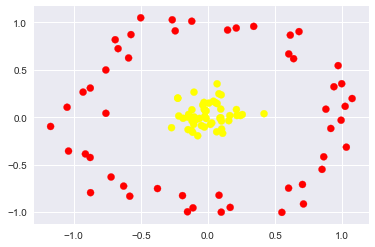

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [26]:
def plot_decision_boundaries(model, ax=None, plot_support=True):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

##### 2. Trying to fit the model using Linear Kernel

In [27]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let us visualize the decision boundaries of the data

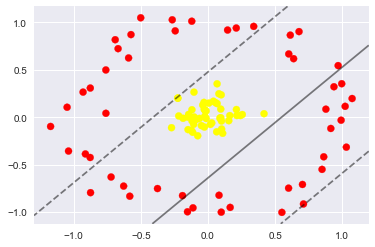

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(clf, plot_support=False);

Form above plot we can observe that no linear discrimination will ever be able to separate this data. 

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very computationally intensive as N grows large. However, because of a neat little procedure known as the kernel trick, a fit on kernel-transformed data can be done implicitly—that is, without ever building the full N-dimensional representation of the kernel projection! 

##### 3. Trying to fit the model using RBF Kernel

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [29]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

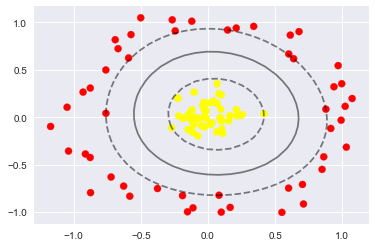

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

So far we have centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

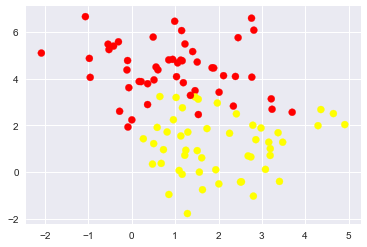

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

##### Summary

<ol>
<li> Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.</li>
<li>Once the model is trained, the prediction phase is very fast.</li>
<li>Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.</li>
<li>Their integration with kernel methods makes them very versatile, able to adapt to many types of data.</li>
</ol>

However, SVMs have several disadvantages as well:

<ol>
<li> The scaling with the number of samples N is [N3] at worst, or [N2] for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.</li>
<li> The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.</li>
<li> The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation</li>
</ol>

#### Acknowledgement :  Python Data Science Handbook by Jake VanderPlas